In [1]:
from physmodjax.solver.wave1d_modal import Wave1dSolverModal
from physmodjax.solver.wave1d_pseudospectral import Wave1dSolverPseudoSpectral
from physmodjax.solver.generator import generate_initial_condition, Gaussian

import matplotlib.pyplot as plt

import numpy as np


dx: 0.005 in meters
dt: 2.0833333333333333e-05 in seconds
number of points (n_gridpoints): (201,)
time in samples (nt): (48000,)
dx: 0.004999999888241291 in meters
dt: 2.0833333333333333e-05 in seconds
number of points (n_gridpoints): (201,)
time in samples (nt): (48000,)


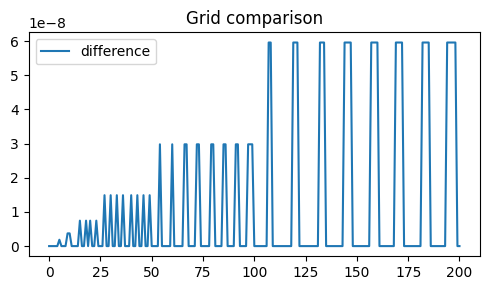

solver_ps.grid.dtype float64
solver_modal.grid.dtype float32
solver_ps.timesteps.dtype float64
solver_modal.timesteps.dtype float32


In [17]:
# solver params
sampling_rate = 48000
final_time = 1.0
n_gridpoints = 201
length = 1.0
wave_speed = 10.0

# initialize solvers
solver_ps = Wave1dSolverPseudoSpectral(
    sampling_rate=sampling_rate,
    final_time=final_time,
    n_gridpoints=n_gridpoints,
    wave_speed=wave_speed,
    length=length,
)

solver_modal = Wave1dSolverModal(
    sampling_rate=sampling_rate,
    final_time=final_time,
    n_gridpoints=n_gridpoints,
    wave_speed=wave_speed,
    length=length,
    n_max_modes=100,
)

# PLot the difference between grids
fig, ax = plt.subplots(1, 1, figsize=(5, 3))
ax.plot(solver_ps.grid - solver_modal.grid, label="difference")
# ax.plot(solver_modal.grid, label="modal")
ax.set_title("Grid comparison")
ax.legend()
fig.tight_layout()
plt.show()


# Print the dtypes of the grid and timesteps
print("solver_ps.grid.dtype", solver_ps.grid.dtype)
print("solver_modal.grid.dtype", solver_modal.grid.dtype)
print("solver_ps.timesteps.dtype", solver_ps.timesteps.dtype)
print("solver_modal.timesteps.dtype", solver_modal.timesteps.dtype)

# Assert that the timesteps are the same
assert np.allclose(solver_ps.timesteps, solver_modal.timesteps)

# Assert that the grid is the same
assert np.allclose(solver_ps.grid, solver_modal.grid)


In [18]:
# Generate initial condition
rng = np.random.default_rng(0)
ic = generate_initial_condition(rng=rng, generator=Gaussian(n_gridpoints))

# solve the wave equation using the initial condition for the modal solver
t_modal, u_modal, v_modal = solver_modal.solve(ic[0], ic[1])

# solve the wave equation using the initial condition for the pseudo spectral solver
t_ps, u_ps, v_ps = solver_ps.solve(ic[0], ic[1])

# Assert that the shapes of the solutions are the same
assert u_modal.shape == u_ps.shape
assert v_modal.shape == v_ps.shape


# Assert that the time steps are the same
assert np.allclose(t_modal, t_ps)


(48000,)
317.89532
-2287.4379240375256
-317.89526


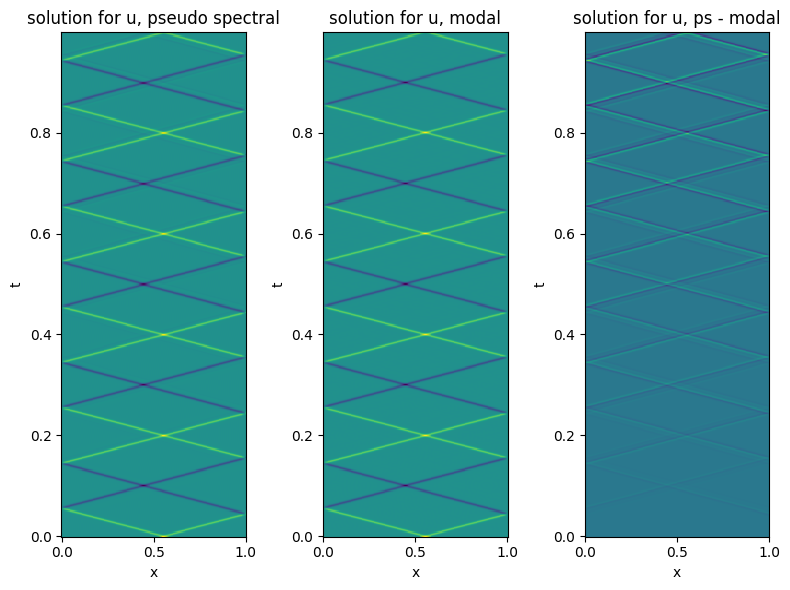

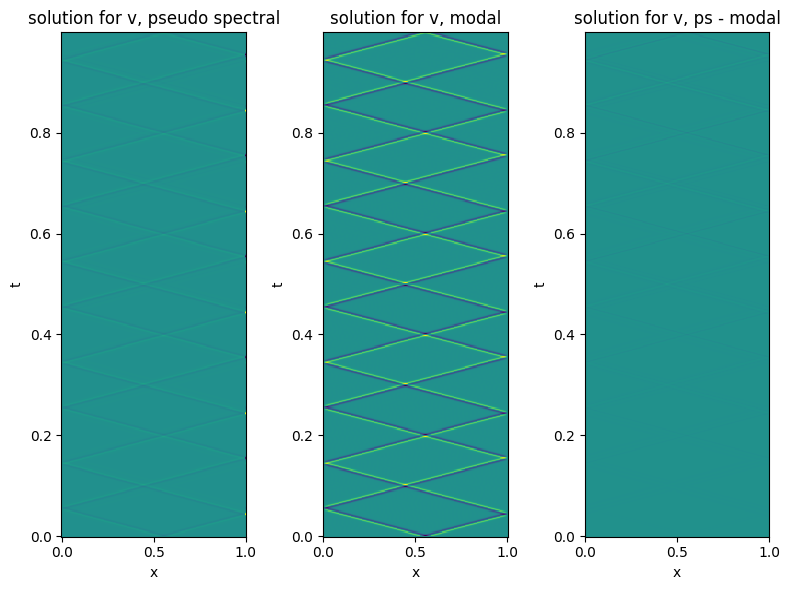

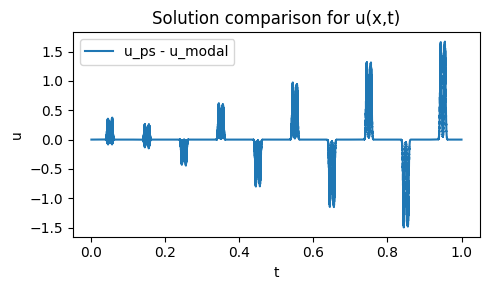

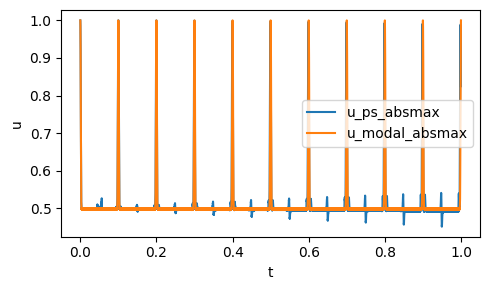

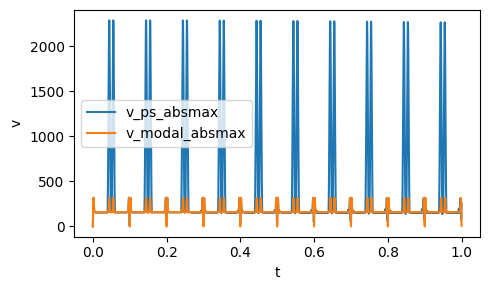

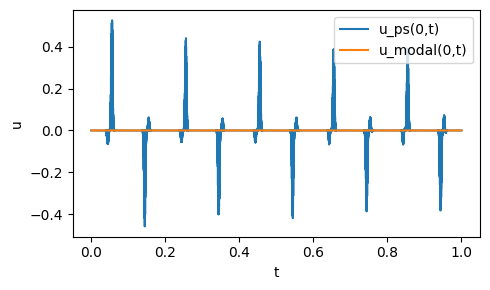

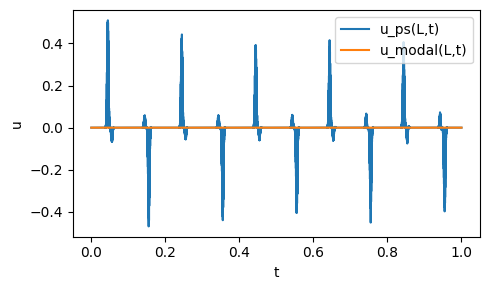

In [21]:
# Plot solutions for u side by side, and their diference
fig, ax = plt.subplots(1, 3, figsize=(8, 6))
ax[0].pcolormesh(solver_ps.grid, t_ps[::100], u_ps[::100], vmin=-1.0, vmax=1.0)
ax[0].set_title("solution for u, pseudo spectral")
ax[0].set_xlabel("x")
ax[0].set_ylabel("t")
ax[1].pcolormesh(solver_modal.grid, t_modal[::100], u_modal[::100], vmin=-1.0, vmax=1.0)
ax[1].set_title("solution for u, modal")
ax[1].set_xlabel("x")
ax[1].set_ylabel("t")
ax[2].pcolormesh(solver_modal.grid, t_modal[::100], u_ps[::100] - u_modal[::100])
ax[2].set_title("solution for u, ps - modal")
ax[2].set_xlabel("x")
ax[2].set_ylabel("t")
fig.tight_layout()

print(np.max(v_ps, axis=1).shape)
print(np.max(v_modal))
print(np.min(v_ps))
print(np.min(v_modal))

# Plot solutions for v side by side, and their diference
fig, ax = plt.subplots(1, 3, figsize=(8, 6))
ax[0].pcolormesh(
    solver_ps.grid, t_ps[::100], v_ps[::100], vmin=np.min(v_ps), vmax=np.max(v_ps)
)
ax[0].set_title("solution for v, pseudo spectral")
ax[0].set_xlabel("x")
ax[0].set_ylabel("t")
ax[1].pcolormesh(
    solver_modal.grid,
    t_modal[::100],
    v_modal[::100],
    vmin=np.min(v_modal),
    vmax=np.max(v_modal),
)
ax[1].set_title("solution for v, modal")
ax[1].set_xlabel("x")
ax[1].set_ylabel("t")
ax[2].pcolormesh(solver_modal.grid, t_modal[::100], v_ps[::100] - v_modal[::100])
ax[2].set_title("solution for v, ps - modal")
ax[2].set_xlabel("x")
ax[2].set_ylabel("t")
fig.tight_layout()


# Plot the difference between the solutions
fig, ax = plt.subplots(1, 1, figsize=(5, 3))
ax.plot(t_ps, np.sum(u_ps - u_modal, axis=1), label="u_ps - u_modal")
ax.set_title("Solution comparison for u(x,t)")
ax.set_xlabel("t")
ax.set_ylabel("u")
ax.legend()
fig.tight_layout()
plt.show()


# Plot the max of the abs of the solutions
fig, ax = plt.subplots(1, 1, figsize=(5, 3))
ax.plot(t_ps, np.max(np.abs(u_ps), axis=1), label="u_ps_absmax")
ax.plot(t_modal, np.max(np.abs(u_modal), axis=1), label="u_modal_absmax")
ax.set_xlabel("t")
ax.set_ylabel("u")
ax.legend()
fig.tight_layout()
plt.show()
fig, ax = plt.subplots(1, 1, figsize=(5, 3))
ax.plot(t_ps, np.max(np.abs(v_ps), axis=1), label="v_ps_absmax")
ax.plot(t_modal, np.max(np.abs(v_modal), axis=1), label="v_modal_absmax")
ax.set_xlabel("t")
ax.set_ylabel("v")
ax.legend()
fig.tight_layout()
plt.show()


# Plot the displacement at the ends of the string
fig, ax = plt.subplots(1, 1, figsize=(5, 3))
ax.plot(t_ps, u_ps[:, 0], label="u_ps(0,t)")
ax.plot(t_modal, u_modal[:, 0], label="u_modal(0,t)")
ax.set_xlabel("t")
ax.set_ylabel("u")
ax.legend()
fig.tight_layout()
plt.show()
fig, ax = plt.subplots(1, 1, figsize=(5, 3))
ax.plot(t_ps, u_ps[:, -1], label="u_ps(L,t)")
ax.plot(t_modal, u_modal[:, -1], label="u_modal(L,t)")
ax.set_xlabel("t")
ax.set_ylabel("u")
ax.legend()
fig.tight_layout()
plt.show()
